Link to html data table used: https://www.basketball-reference.com/awards/slam_500_greatest.html

# IMPORTANT NOTE: USED Dr. Abhijit Mishra's Hands-on 5: Data-Engineering I - Data Curation & Hands-on 6: Data-Engineering II - Data Visualization code for this project

Pseudocode:
0. Start
1. Import libraries for web-scraping and reading csv (BeautifulSoup & Pandas) with exception handling
2. Open html webpage of choice and parse its data with BeautifulSoup and html parser
3. First step of ETL is Extract: Create empty list for the raw data. From there scan website for tables/td. Go through the rows of tables found and append each element into 1 list (which was initally the empty raw data list)
4. Second step of ETL is Transform
- Use while loop to take 1 long list of data and separate into smaller lists (pertaining to each row - and starting at the variable "rank")
- To dig deeper into while loop: our raw_data contains all of the rows of our data but they are not being seperated from each other and rather it's 1 long list of everything that is only separated by commas - so we use a while loop such that (while i < everything in raw data), we retrieve one row from raw data at a time, and we add Rank with insert(0,Rank) because rank is another html element, and then we lastly iterate our counters
- Print first 6 rows to make sure smaller lists have been made
- See how it looks in final dataframe using parameters of final data and column names
- Try making a function for fixing/cleaning data as the % (FT,FG,3PT)variables show up as decimals in the data table, thus multiple each data value by 100 and round to 1st decimal place
5. Third step of ETL is Load
- Load extracted and tranformed data and convert it to csv file
6. Read final file (csv) and learn about columns/attribute's non-null using info command
7. Since, we have performed ETL, we can visualize and analyze our data - Let's first install the matplotlib and pandas as they are required for our graphs
8. Use libraries to create box chart (plt.bar) and also use them for axis and titles
9. Use libraries to create box plot (plt.boxplot)and also use them for axis and titles
10. Use libraries to create scatterplot (plt.scatter)and also use them for axis and titles
11. Since career average points were our main variable of interest, we will run its descriptive statistics with the describe command and print each id's career average points
12. End


In [ ]:
# code from Hands-on 5: Data-Engineering I - Data Curation

# Import Libraries

from bs4 import BeautifulSoup
import pandas as pd
print ("BeautifulSoup and Pandas are ready!")

import requests

BeautifulSoup and Pandas are ready!


In [ ]:
# code from Hands-on 5: Data-Engineering I - Data Curation

opened_webpage = requests.get("https://www.basketball-reference.com/awards/slam_500_greatest.html")
print ("Webpage has been opened")

# Use BeautifulSoup to read and parse the Slam Basketball webpage
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed")

Webpage has been opened
Webpage loaded and parsed


In [ ]:
# code from Hands-on 5: Data-Engineering I - Data Curation

#EXTRACT

# Create empty list for raw data
raw_data = []

# Find all the tables (tr or td according to html code - inspect element) in the webpage parsed
table = bs.find_all("td")

for row in table: # For loop to go through row and append row text
    line = row.text
    raw_data.append(line)

print(raw_data) # Print Raw Data

['Michael Jordan', '1985', '2003', '1072', '38.3', '30.1', '6.2', '5.3', '2.3', '0.8', '.497', '.327', '.835', '214.0', '.250', 'Wilt Chamberlain', '1960', '1973', '1045', '45.8', '30.1', '22.9', '4.4', '', '', '.540', '', '.511', '247.3', '.248', 'Bill Russell', '1957', '1969', '963', '42.3', '15.1', '22.5', '4.3', '', '', '.440', '', '.561', '163.5', '.193', "Shaquille O'Neal", '1993', '2011', '1207', '34.7', '23.7', '10.9', '2.5', '0.6', '2.3', '.582', '.045', '.527', '181.7', '.208', 'Oscar Robertson', '1961', '1974', '1040', '42.2', '25.7', '7.5', '9.5', '1.1', '0.1', '.485', '', '.838', '189.2', '.207', 'Magic Johnson', '1980', '1996', '906', '36.7', '19.5', '7.2', '11.2', '1.9', '0.4', '.520', '.303', '.848', '155.8', '.225', 'Kareem Abdul-Jabbar', '1970', '1989', '1560', '36.8', '24.6', '11.2', '3.6', '0.9', '2.6', '.559', '', '.721', '273.4', '.228', 'Tim Duncan', '1998', '2016', '1392', '34.0', '19.0', '10.8', '3.0', '0.7', '2.2', '.506', '.179', '.696', '206.4', '.209', 'Lar

In [ ]:
# code from Hands-on 5: Data-Engineering I - Data Curation

#TRANSFORM

# Write out each column name
column_names = ["Rank",	"Player",	"From", "To",	"G",	"MP",	"PTS",	"TRB",	"AST",	"STL",	"BLK",	"FG%",	"3P%",	"FT%",	"WS",	"WS/48"]

# Use while loop to create lists (for each individual player's stats) within a list (of all the data)
i = 0
Rank = 1
final_data = []
while i < len(raw_data):
    stats = raw_data[i:i+len(column_names)-1] #retrieve one data row at a time
    stats.insert(0, Rank) #rank is in separate html element
    final_data.append(stats)
    i += len(column_names)-1 #iterate counters
    Rank += 1

#Print first 6 rows
print(final_data[:6]) #should print 500 lists within a list


[[1, 'Michael Jordan', '1985', '2003', '1072', '38.3', '30.1', '6.2', '5.3', '2.3', '0.8', '.497', '.327', '.835', '214.0', '.250'], [2, 'Wilt Chamberlain', '1960', '1973', '1045', '45.8', '30.1', '22.9', '4.4', '', '', '.540', '', '.511', '247.3', '.248'], [3, 'Bill Russell', '1957', '1969', '963', '42.3', '15.1', '22.5', '4.3', '', '', '.440', '', '.561', '163.5', '.193'], [4, "Shaquille O'Neal", '1993', '2011', '1207', '34.7', '23.7', '10.9', '2.5', '0.6', '2.3', '.582', '.045', '.527', '181.7', '.208'], [5, 'Oscar Robertson', '1961', '1974', '1040', '42.2', '25.7', '7.5', '9.5', '1.1', '0.1', '.485', '', '.838', '189.2', '.207'], [6, 'Magic Johnson', '1980', '1996', '906', '36.7', '19.5', '7.2', '11.2', '1.9', '0.4', '.520', '.303', '.848', '155.8', '.225']]


In [ ]:
# code from Hands-on 5: Data-Engineering I - Data Curation

final_data = pandas.DataFrame(final_data,columns=column_names) # Show data as well as column names in dataframe

# Print dataframe
final_data

,Rank,Player,From,To,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Michael Jordan,1985,2003,1072,38.3,30.1,6.2,5.3,2.3,0.8,.497,.327,.835,214.0,.250
1,2,Wilt Chamberlain,1960,1973,1045,45.8,30.1,22.9,4.4,,,.540,,.511,247.3,.248
2,3,Bill Russell,1957,1969,963,42.3,15.1,22.5,4.3,,,.440,,.561,163.5,.193
3,4,Shaquille O'Neal,1993,2011,1207,34.7,23.7,10.9,2.5,0.6,2.3,.582,.045,.527,181.7,.208
4,5,Oscar Robertson,1961,1974,1040,42.2,25.7,7.5,9.5,1.1,0.1,.485,,.838,189.2,.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Kevin Duckworth,1987,1997,684,25.5,11.8,5.8,0.9,0.5,0.5,.468,.208,.736,24.7,.068
496,497,Chris Kaman,2004,2016,735,26.7,11.2,7.6,1.3,0.4,1.3,.489,.042,.743,24.6,.060
497,498,Cuttino Mobley,1999,2009,747,37.0,16.0,3.9,2.7,1.2,0.4,.433,.378,.835,52.2,.091
498,499,David Wesley,1994,2007,949,31.9,12.5,2.5,4.4,1.3,0.2,.424,.368,.786,61.3,.097


In [ ]:
# code from Hands-on 5: Data-Engineering I - Data Curation

# Function for data cleaning/convert decimal to percentage (round 2 decimals)
def convert_decimal_to_percentage(g):
    if g == "": #add statement for places with blank data
      return 0
    return round(float(g)*100,2)

final_data["FG%"] = final_data["FG%"].apply(convert_decimal_to_percentage) #apply function to % columns
final_data["FT%"] = final_data["FT%"].apply(convert_decimal_to_percentage)
final_data["3P%"] = final_data["3P%"].apply(convert_decimal_to_percentage)

final_data

,Rank,Player,From,To,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Michael Jordan,1985,2003,1072,38.3,30.1,6.2,5.3,2.3,0.8,49.7,32.7,83.5,214.0,.250
1,2,Wilt Chamberlain,1960,1973,1045,45.8,30.1,22.9,4.4,,,54.0,0.0,51.1,247.3,.248
2,3,Bill Russell,1957,1969,963,42.3,15.1,22.5,4.3,,,44.0,0.0,56.1,163.5,.193
3,4,Shaquille O'Neal,1993,2011,1207,34.7,23.7,10.9,2.5,0.6,2.3,58.2,4.5,52.7,181.7,.208
4,5,Oscar Robertson,1961,1974,1040,42.2,25.7,7.5,9.5,1.1,0.1,48.5,0.0,83.8,189.2,.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Kevin Duckworth,1987,1997,684,25.5,11.8,5.8,0.9,0.5,0.5,46.8,20.8,73.6,24.7,.068
496,497,Chris Kaman,2004,2016,735,26.7,11.2,7.6,1.3,0.4,1.3,48.9,4.2,74.3,24.6,.060
497,498,Cuttino Mobley,1999,2009,747,37.0,16.0,3.9,2.7,1.2,0.4,43.3,37.8,83.5,52.2,.091
498,499,David Wesley,1994,2007,949,31.9,12.5,2.5,4.4,1.3,0.2,42.4,36.8,78.6,61.3,.097


In [ ]:
# code from Hands-on 5: Data-Engineering I - Data Curation

#LOAD
final_data.to_csv("NBA_player_stats.csv") # convert final data and LOAD to csv file that shows up in final data
# code from Hands-on 6: Data-Engineering II - Data Visualization

nba_df = pd.read_csv("NBA_player_stats.csv") #read file/csv

nba_df.info() #tells us about each of columns/attribute's non-null count (how many of them have a data value) and variable type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   Rank        500 non-null    int64  
 2   Player      500 non-null    object 
 3   From        500 non-null    int64  
 4   To          500 non-null    int64  
 5   G           500 non-null    int64  
 6   MP          500 non-null    float64
 7   PTS         500 non-null    float64
 8   TRB         500 non-null    float64
 9   AST         500 non-null    float64
 10  STL         433 non-null    float64
 11  BLK         433 non-null    float64
 12  FG%         500 non-null    float64
 13  3P%         500 non-null    float64
 14  FT%         500 non-null    float64
 15  WS          500 non-null    float64
 16  WS/48       500 non-null    float64
dtypes: float64(11), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
# code from Hands-on 6: Data-Engineering II - Data Visualization

# Import matplotlib libraries and print if imported or not
import pandas
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

# Don't ignore any output printed out and import InteractiveShell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Imported all libraries successfully...


<BarContainer object of 6 artists>

Text(0.5, 0, 'Player Name')

Text(0, 0.5, 'Career Average Points Per Game')

Text(0.5, 1.0, 'Career Average Points Per Game For 6 NBA Players')

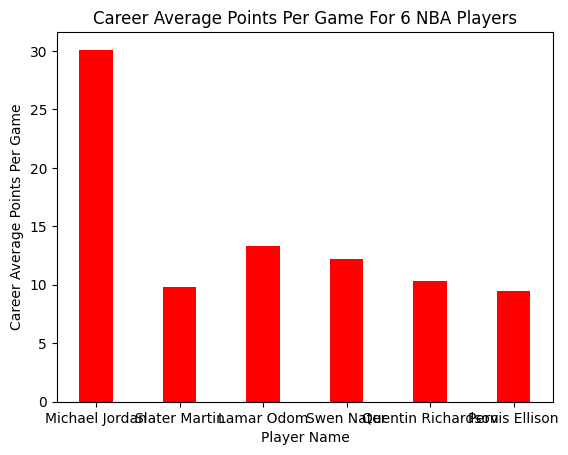

In [ ]:
# code from Hands-on 6: Data-Engineering II - Data Visualization

#For Bar Graph
six_random_player_ids = [0,100,200,300,400,499] #choose 6 player ids to pull data from

player_column = nba_df["Player"] #get player column
points_column = nba_df["PTS"] #get points column

selected_players = [] #create empty lists
selected_points = [] #create empty lists

for random_player_id in six_random_player_ids: #for loop to append/get data from columns for corresponding players
    selected_players.append(player_column[random_player_id])
    selected_points.append(points_column[random_player_id])

plt.bar(selected_players, selected_points, color ='red', width = 0.4) # Bar graph specifications - axis, color, width

plt.xlabel("Player Name") # axis labels
plt.ylabel("Career Average Points Per Game")

plt.title("Career Average Points Per Game For 6 NBA Players") #title


Bar Graph Insights:
- This visualization lets me compare the career average points per game between 5 NBA players
- I used this form of visualization as I am comparing the particular numerical data values (career average points) for a categorical variable (players)
- I was intential with the player ids (which is basically their rank) I picked as I wanted to see if the worser players have a lower career points average. From this data there is a downward trend but there seems to be an outlier with the second player (Slater Martin) as his career average points are lower than the lowest ranked player. This goes to show that data can be surprising and there are so many other important aspects that go into determining an NBA player's rank.

{'whiskers': [<matplotlib.lines.Line2D at 0x7b5b8ca32c80>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5b8ca331c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5b8ca329e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5b8ca33700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5b8ca339a0>],
 'means': []}

Text(0.5, 0, 'Career Average Points')

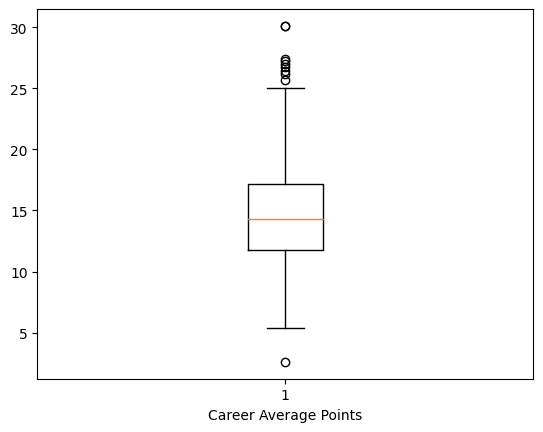

In [ ]:
# code from Hands-on 6: Data-Engineering II - Data Visualization

# For Boxplot
minutes_column = nba_df["PTS"] #get points column from data
plt.boxplot(minutes_column) #create boxplot with points variable
plt.xlabel("Career Average Points") #x-axis

Box Plot Insights:
- In this boxplot, I am interested in getting a 5-number summary of the career average points variable.
- As I mentioned in my response in Hands-on 6, we can determine the min, max, lower & upper quartile, and median, and from those the IQR & range. The boxplot is also a method of determining skew and outliers.
- The median seems to be in the middle of the 1st and 3rd quartile, indicating no skew in our data.
- Our boxplot seems to have quite a few outliers from that are not in range (we won't know for sure till we use the formula to calculate what numbers pass a the certain number to be an outlier.
- Based on our outliers, it is very rare to see a player (on this list) to average less than 5 career points per game
- The range of the data for minutes played is quite large and appears to be a bit less than 20 points.
- Inference: This list comprises of the top 500 NBA players (past & present) so even being 500 is quite an achievement and show me that even the lowest ranked players contributed quite a bit in terms of points but have a strong suit in another area that added them to this list

Text(0.5, 0, 'Career Average Minutes Played')

Text(0, 0.5, 'Career Average Points')

Text(0.5, 1.0, 'Career Average Minutes Played vs. Career Average Points')

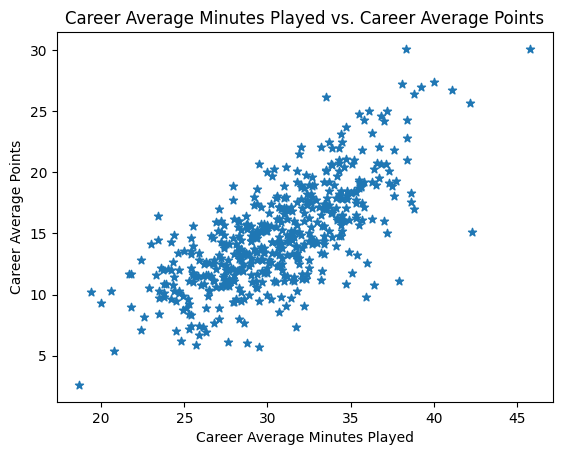

In [ ]:
# code from Hands-on 6: Data-Engineering II - Data Visualization

# For scatterplot
minutes_column = nba_df["MP"] #get points column
points_column = nba_df["PTS"] #get assists column

plt.scatter(minutes_column,points_column, marker="*") #scatterplot specifications - axis, symbol

plt.xlabel("Career Average Minutes Played") #x-axis
plt.ylabel("Career Average Points") #y-axis

plt.title("Career Average Minutes Played vs. Career Average Points") #title


Scatterplot Insights:
- I am using a scatterplot as I am interested in seeing if there's a correlation between 2 numeric and continuous variables (x:career average minutes played, y:career average points)
- It seems that our data is very clumped and close together. However, there is a visible moderate-strong linear positive relationship between Career Average Minutes Played & Career Average Points

In [ ]:
# code from Hands-on 6: Data-Engineering II - Data Visualization

nba_df = pd.read_csv("NBA_player_stats.csv") #read file/csv

nba_df.info() #tells us about each of columns/attribute's non-null count (how many of them have a data value) and variable type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   Rank        500 non-null    int64  
 2   Player      500 non-null    object 
 3   From        500 non-null    int64  
 4   To          500 non-null    int64  
 5   G           500 non-null    int64  
 6   MP          500 non-null    float64
 7   PTS         500 non-null    float64
 8   TRB         500 non-null    float64
 9   AST         500 non-null    float64
 10  STL         433 non-null    float64
 11  BLK         433 non-null    float64
 12  FG%         500 non-null    float64
 13  3P%         500 non-null    float64
 14  FT%         500 non-null    float64
 15  WS          500 non-null    float64
 16  WS/48       500 non-null    float64
dtypes: float64(11), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
final_data["PTS"].describe() #Descriptive statistics of points as well as each id's career average points

PTS = nba_df["PTS"]
print (PTS)


count      500
unique     163
top       12.8
freq        10
Name: PTS, dtype: object

0      30.1
1      30.1
2      15.1
3      23.7
4      25.7
       ... 
495    11.8
496    11.2
497    16.0
498    12.5
499     9.5
Name: PTS, Length: 500, dtype: float64
